In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

sys.path.append("../../pipeline/src")
import pickle
import torch
from tqdm import tqdm

In [3]:
from utils.evaluation import PredictionDataset, load_data, compute_metrics_dataframe, compute_average_metrics, plot_contacts_and_predictions, create_contact_visualizations, add_cluster_information, create_metrics_boxplots, run_full_evaluation

All seeds set to: 42


In [4]:
dataset, prediction_dataset, clusters = load_data(
    dataset_path="../../pipeline/output/datasets/val.pt",
    predictions_path="../../pipeline/output/predictions/val.pkl",
    clusters_path="../../pipeline/output/mmseqs/all_seqs_clust.tsv",
)

In [5]:
clusters

,cluster,id
0,train_5ZZK_A,train_5ZZK_A
1,train_6BZQ_C,train_6BZQ_C
2,train_6BZQ_C,train_6BZQ_D
3,train_6BZQ_C,train_6BZA_A
4,train_6BZQ_C,train_6BZA_B
...,...,...
25874,train_8P14_A,train_8P19_A
25875,train_8P14_A,train_6HEH_A
25876,train_2E4T_A,train_2E4T_A
25877,train_4QQ0_A,train_4QQ0_A


In [7]:

print("Computing metrics...")
metrics_df = compute_metrics_dataframe(dataset, prediction_dataset)
metrics_df

Computing metrics...


Computing metrics:   0%|          | 0/767 [00:00<?, ?it/s]

/workspace/esm-2-contact-map/ipynb/visualize/../../pipeline/src/utils/evaluation.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  contact_map = torch.tensor(item["distance_map"] < 8, dtype=torch.long).unsqueeze(0)
Computing metrics: 100%|██████████| 767/767 [00:30<00:00, 25.17it/s]


,roc_auc_short,precision_short@L/1,precision_short@L/2,precision_short@L/5,roc_auc_medium,precision_medium@L/1,precision_medium@L/2,precision_medium@L/5,roc_auc_long,precision_long@L/1,precision_long@L/2,precision_long@L/5,roc_auc_full,precision_full@L/1,precision_full@L/2,precision_full@L/5
id,,,,,,,,,,,,,,,,
train_1A77_A,0.898418,0.187302,0.331210,0.587302,0.968791,0.244444,0.394904,0.634921,0.884389,0.387302,0.579618,0.809524,0.905261,0.571429,0.732484,0.873016
train_1AQJ_A,0.929473,0.154856,0.300000,0.460526,0.951941,0.356955,0.542105,0.697368,0.972411,0.527559,0.626316,0.842105,0.968331,0.595801,0.726316,0.894737
train_1AQJ_B,0.929209,0.156658,0.293194,0.447368,0.948457,0.344648,0.513089,0.671053,0.973612,0.532637,0.628272,0.815789,0.968891,0.577023,0.706806,0.907895
train_1C1K_A,0.778583,0.078341,0.129630,0.279070,0.858808,0.041475,0.055556,0.069767,0.646087,0.023041,0.037037,0.046512,0.697244,0.087558,0.111111,0.139535
train_1C90_A,0.923589,0.245283,0.446970,0.698113,0.924877,0.252830,0.409091,0.566038,0.971984,0.626415,0.787879,0.924528,0.963427,0.701887,0.833333,0.962264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_8XWK_C,0.933472,0.180723,0.322581,0.632653,0.933073,0.313253,0.516129,0.693878,0.982557,0.642570,0.830645,0.877551,0.972906,0.730924,0.838710,0.897959
train_8XWK_D,0.938314,0.192000,0.344000,0.660000,0.928208,0.304000,0.496000,0.680000,0.982641,0.632000,0.824000,0.900000,0.972711,0.720000,0.856000,0.880000
train_8Y8Y_A,0.974905,0.352313,0.578571,0.839286,0.961067,0.316726,0.457143,0.678571,0.906011,0.274021,0.407143,0.607143,0.928573,0.583630,0.792857,0.946429


In [9]:

print("Computing average metrics...")
avg_metrics_simple = compute_average_metrics(metrics_df, dataset, method="simple")
avg_metrics_pdb_first = compute_average_metrics(
    metrics_df, dataset, method="pdb_first"
)
display(avg_metrics_simple)
display(avg_metrics_pdb_first)

Computing average metrics...


{'roc_auc_short': 0.9222852171670645,
 'precision_short@L/1': 0.254396845757262,
 'precision_short@L/2': 0.40991889412444,
 'precision_short@L/5': 0.6323539118511852,
 'roc_auc_medium': 0.930415823486715,
 'precision_medium@L/1': 0.2795589364994775,
 'precision_medium@L/2': 0.41819558700867054,
 'precision_medium@L/5': 0.5959701060175092,
 'roc_auc_long': 0.900650270575284,
 'precision_long@L/1': 0.4346125990769632,
 'precision_long@L/2': 0.5684314369265858,
 'precision_long@L/5': 0.7134217384862265,
 'roc_auc_full': 0.913044411857832,
 'precision_full@L/1': 0.5871865958167247,
 'precision_full@L/2': 0.7165795948783092,
 'precision_full@L/5': 0.8300825849158625}

{'roc_auc_short': 0.9219899689442537,
 'precision_short@L/1': 0.24990017501954473,
 'precision_short@L/2': 0.4046770047887438,
 'precision_short@L/5': 0.6283995981880082,
 'roc_auc_medium': 0.9303174693574408,
 'precision_medium@L/1': 0.2775891528229491,
 'precision_medium@L/2': 0.41639557506496455,
 'precision_medium@L/5': 0.5962337982162289,
 'roc_auc_long': 0.8993450660117799,
 'precision_long@L/1': 0.4310961201287758,
 'precision_long@L/2': 0.5617751748161721,
 'precision_long@L/5': 0.7058264937542214,
 'roc_auc_full': 0.9122753742635583,
 'precision_full@L/1': 0.5839079767829493,
 'precision_full@L/2': 0.713542709983231,
 'precision_full@L/5': 0.8272828973720713}

In [10]:

print("Adding cluster information...")
metrics_with_clusters = add_cluster_information(metrics_df, clusters, dataset)
metrics_with_clusters

Adding cluster information...


,roc_auc_short,precision_short@L/1,precision_short@L/2,precision_short@L/5,roc_auc_medium,precision_medium@L/1,precision_medium@L/2,precision_medium@L/5,roc_auc_long,precision_long@L/1,precision_long@L/2,precision_long@L/5,roc_auc_full,precision_full@L/1,precision_full@L/2,precision_full@L/5,cluster_size
id,,,,,,,,,,,,,,,,,
train_1A77_A,0.898418,0.187302,0.331210,0.587302,0.968791,0.244444,0.394904,0.634921,0.884389,0.387302,0.579618,0.809524,0.905261,0.571429,0.732484,0.873016,3
train_1AQJ_A,0.929473,0.154856,0.300000,0.460526,0.951941,0.356955,0.542105,0.697368,0.972411,0.527559,0.626316,0.842105,0.968331,0.595801,0.726316,0.894737,4
train_1AQJ_B,0.929209,0.156658,0.293194,0.447368,0.948457,0.344648,0.513089,0.671053,0.973612,0.532637,0.628272,0.815789,0.968891,0.577023,0.706806,0.907895,4
train_1C1K_A,0.778583,0.078341,0.129630,0.279070,0.858808,0.041475,0.055556,0.069767,0.646087,0.023041,0.037037,0.046512,0.697244,0.087558,0.111111,0.139535,1
train_1C90_A,0.923589,0.245283,0.446970,0.698113,0.924877,0.252830,0.409091,0.566038,0.971984,0.626415,0.787879,0.924528,0.963427,0.701887,0.833333,0.962264,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_8XWK_C,0.933472,0.180723,0.322581,0.632653,0.933073,0.313253,0.516129,0.693878,0.982557,0.642570,0.830645,0.877551,0.972906,0.730924,0.838710,0.897959,13
train_8XWK_D,0.938314,0.192000,0.344000,0.660000,0.928208,0.304000,0.496000,0.680000,0.982641,0.632000,0.824000,0.900000,0.972711,0.720000,0.856000,0.880000,13
train_8Y8Y_A,0.974905,0.352313,0.578571,0.839286,0.961067,0.316726,0.457143,0.678571,0.906011,0.274021,0.407143,0.607143,0.928573,0.583630,0.792857,0.946429,1


Creating visualizations...


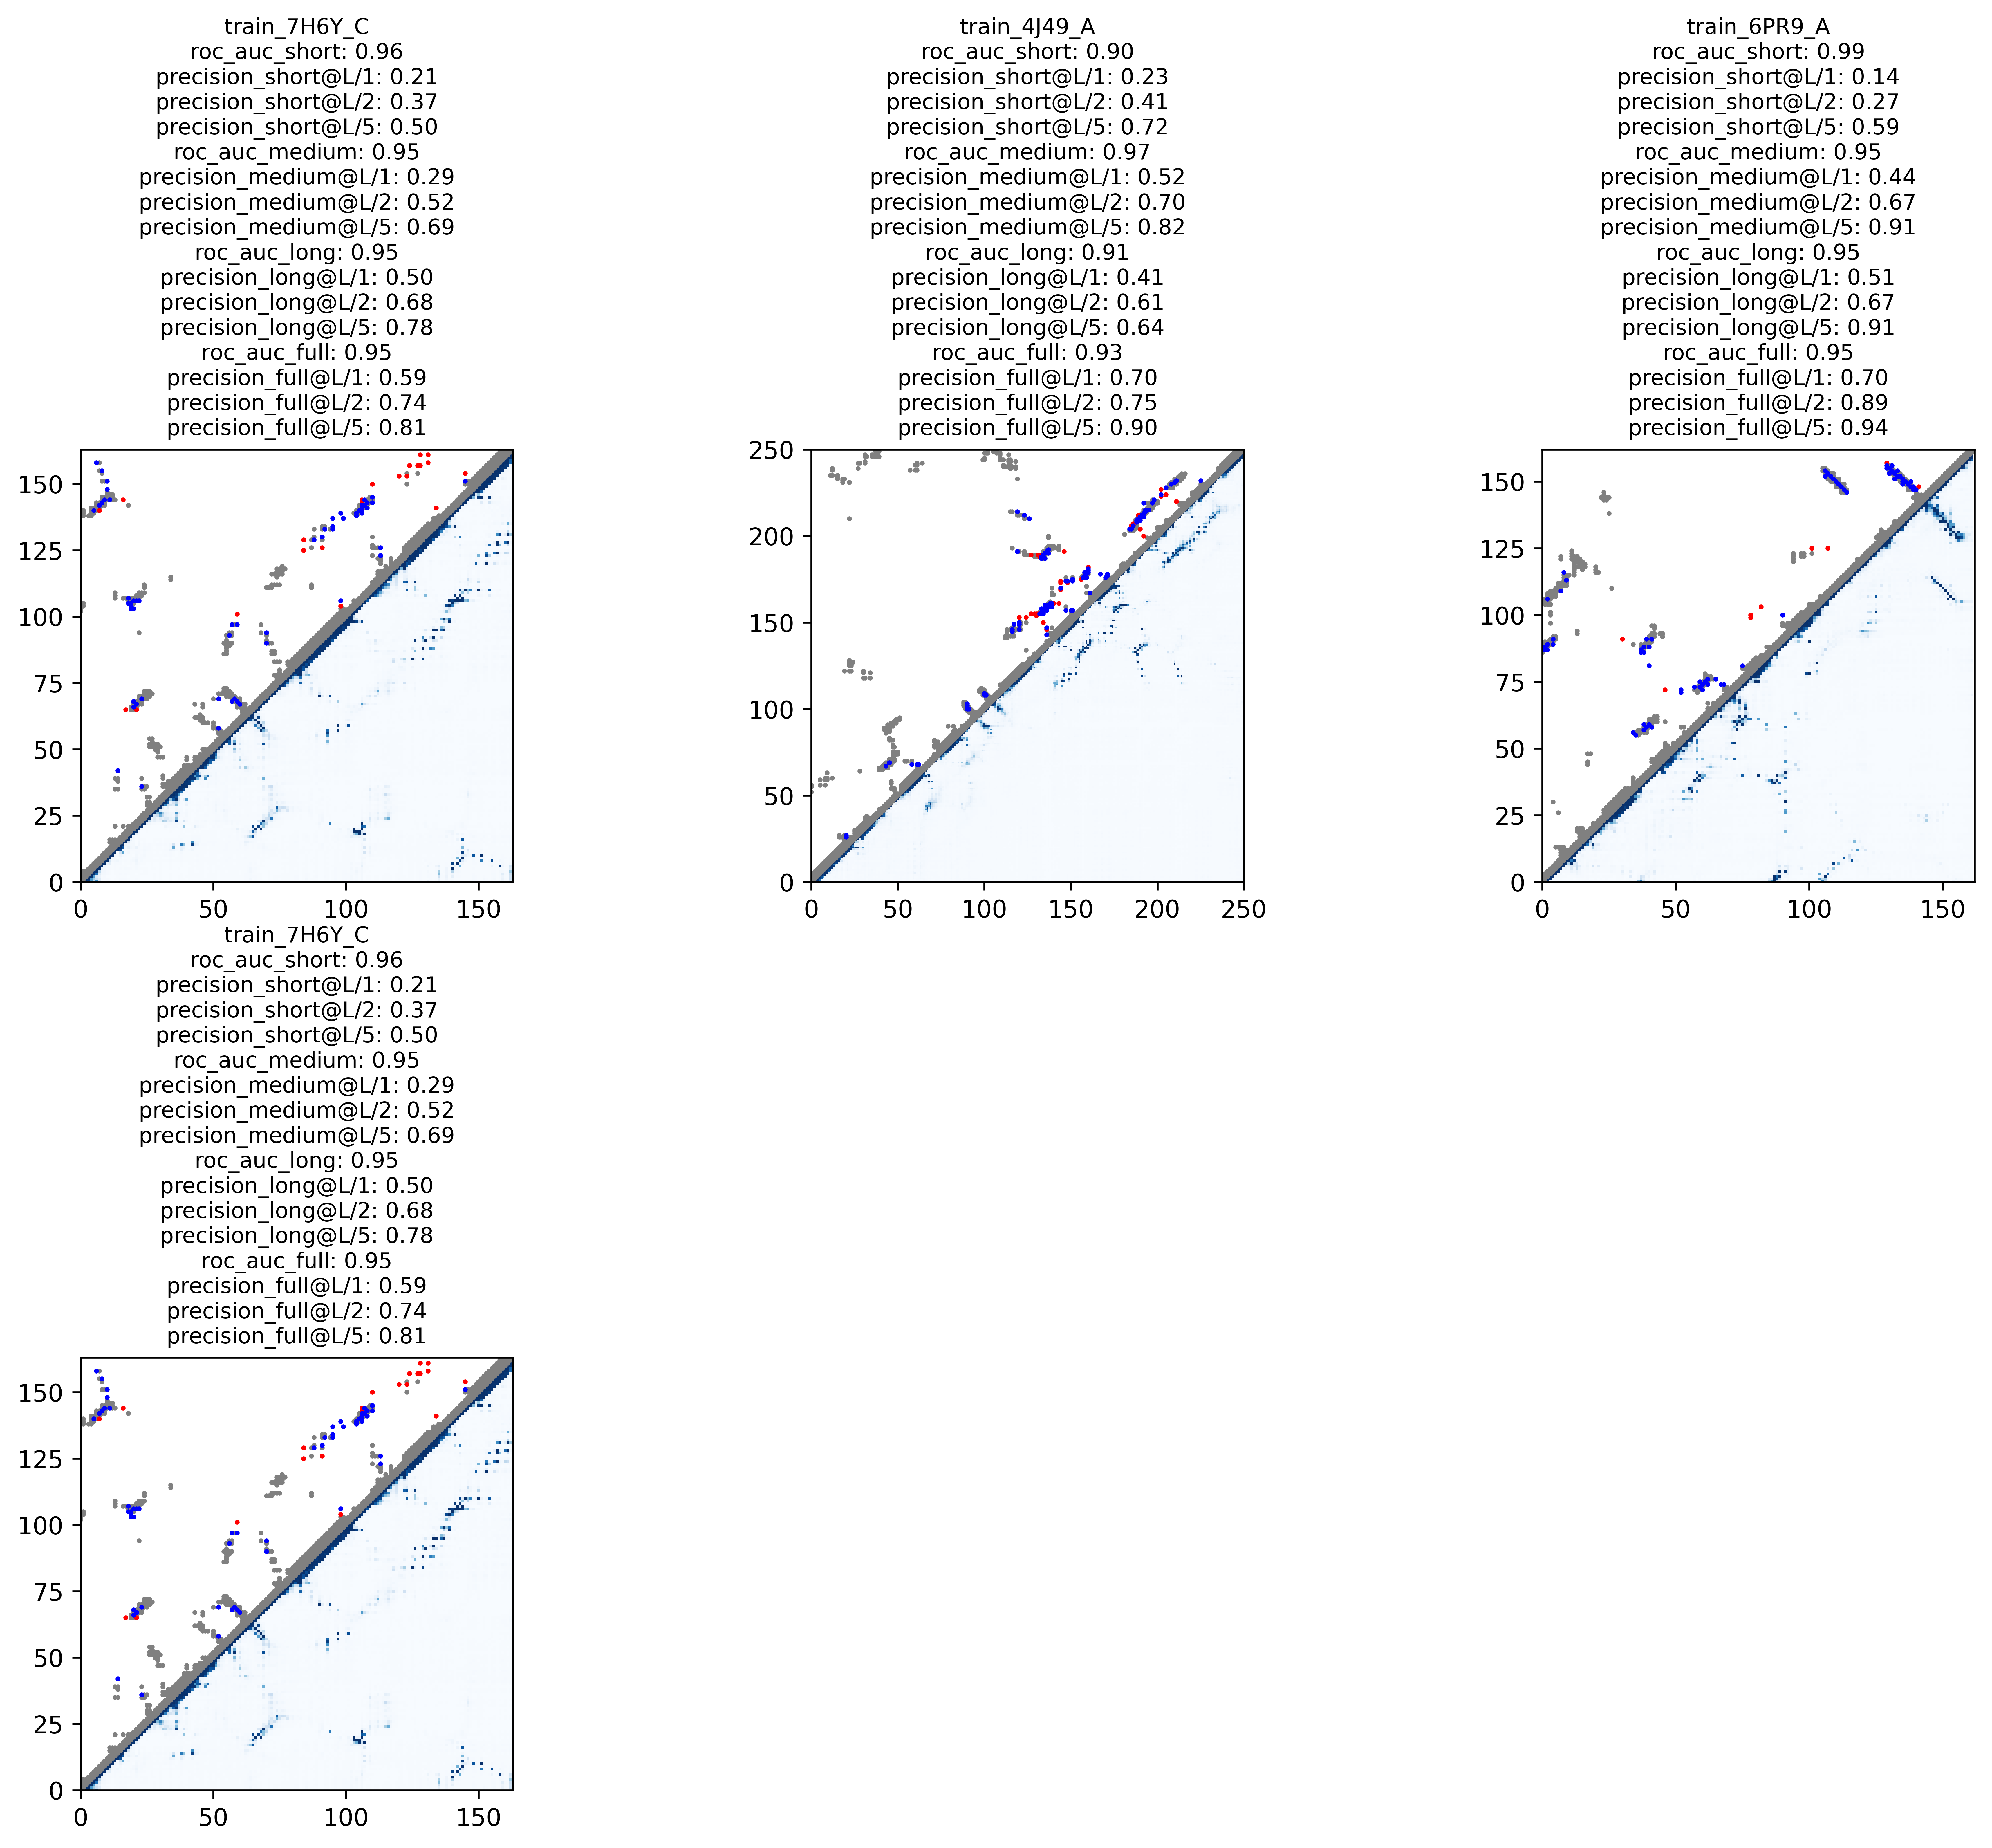

In [29]:

print("Creating visualizations...")
contact_figures = create_contact_visualizations(
    dataset, prediction_dataset, metrics_df, fixed_ids=['train_7H6Y_C', 'train_4J49_A', 'train_6PR9_A', 'train_7H6Y_C']
)


In [30]:

print("Creating boxplots...")
boxplot_figure = create_metrics_boxplots(metrics_with_clusters)

Creating boxplots...


In [32]:
boxplot_figure.savefig("boxplot_figure.png", )